# Finite elements

Nodal positions: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
FE solution T: [ 40. 101. 152. 193. 224. 245. 256. 257. 248. 229. 200.]
Exact at nodes : [ 40. 101. 152. 193. 224. 245. 256. 257. 248. 229. 200.]


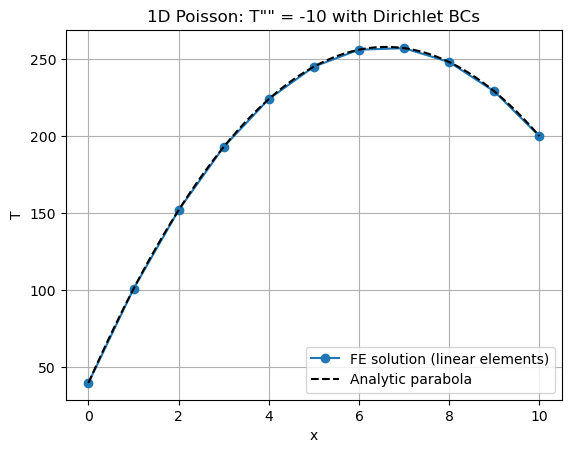

In [3]:
# solve with finite elements the equation d^2 T/ d x^2 = -f(x)
# with f(x)=10, T(0)=40, T(10)=200
import numpy as np
import matplotlib.pyplot as plt

# Problem setup: Poisson equation on [0, L] with constant source
L = 10.0
T0, TL = 40.0, 200.0
f_val = 10.0
nel = 10  # number of linear elements
nn = nel + 1

# Mesh
x = np.linspace(0, L, nn)
h = L / nel

# Global stiffness matrix and load vector
K = np.zeros((nn, nn))
f = np.zeros(nn)

for e in range(nel):
    nodes = [e, e + 1]
    ke = (1.0 / h) * np.array([[1, -1], [-1, 1]])
    fe = f_val * h / 2.0 * np.array([1, 1])  # constant source over the element
    for i_local, i_global in enumerate(nodes):
        for j_local, j_global in enumerate(nodes):
            K[i_global, j_global] += ke[i_local, j_local]
        f[i_global] += fe[i_local]

# Apply Dirichlet boundary conditions via penalty method
penalty = 1e20
K[0, 0] += penalty
f[0] += penalty * T0
K[-1, -1] += penalty
f[-1] += penalty * TL

T = np.linalg.solve(K, f)

# Analytic parabolic solution to compare (Chapra & Canale Fig. 31.8)
def T_exact(x):
    # Solve T'' = -10 with T(0)=40, T(10)=200 -> T = -5x^2 + 66x + 40
    return -5.0 * x**2 + 66.0 * x + 40.0

x_fine = np.linspace(0, L, 200)
T_fine = T_exact(x_fine)

print('Nodal positions:', x)
print('FE solution T:', T)
print('Exact at nodes :', T_exact(x))

plt.plot(x, T, '-o', label='FE solution (linear elements)')
plt.plot(x_fine, T_fine, 'k--', label='Analytic parabola')
plt.xlabel('x')
plt.ylabel('T')
plt.legend()
plt.title('1D Poisson: T"" = -10 with Dirichlet BCs')
plt.grid(True)
plt.show()
